## Libraries

In [1]:
import os
import numpy as np
import pandas as pd
from torch.utils.data import Dataset
from PIL import Image
import torch
import torch.utils.data
from torchvision import datasets
from torchvision import transforms
from torch.utils.data.sampler import SubsetRandomSampler

from collections import Counter
from sklearn.model_selection import train_test_split


___

In [2]:
path = '/media/mestecha/Samsung_T5/SAGAN/ISIC-Archive/Data'

___

In [17]:
labels_df = pd.read_csv(os.path.join(path, 'metadata.csv'))

In [39]:
labels_df.loc[labels_df['target'] == 2, 'target'] = 1

In [40]:
labels_df

,ID,dcm_name,age,anatomy,benign_malignant,diagnosis,sex,target
0,5436e3acbae478396759f0d1,ISIC_0000001,30.0,anterior torso,benign,nevus,female,0
1,5436e3acbae478396759f0d3,ISIC_0000002,60.0,upper extremity,malignant,melanoma,female,1
2,5436e3acbae478396759f0d5,ISIC_0000003,30.0,upper extremity,benign,nevus,male,0
3,5436e3acbae478396759f0d9,ISIC_0000005,40.0,anterior torso,benign,nevus,female,0
4,5436e3acbae478396759f0df,ISIC_0000008,30.0,anterior torso,benign,nevus,female,0
...,...,...,...,...,...,...,...,...
22917,IP_3970525,ISIC_9974166,45.0,torso,benign,nevus,female,0
22918,IP_9245079,ISIC_9975949,40.0,torso,benign,nevus,male,0
22919,IP_2673125,ISIC_9977219,60.0,torso,benign,nevus,male,0
22920,IP_3091321,ISIC_9979765,45.0,torso,benign,nevus,male,0


In [22]:
y = labels_df['target']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(labels_df, y, test_size=0.7, stratify=y)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train)

In [45]:
print(f'Train  feature size: {len(X_train)}')
# print(f'Validation feature size: {len(X_val)}')
print(f'Test feature size: {len(X_test)}')
print(f'Train target size: {len(y_train)}')
# print(f'Validation target size: {len(y_val)}')
print(f'Test target size: {len(y_test)}')
# Counter(X_train['target'].tolist()) == Counter(y_train.tolist())

Train  feature size: 6876
Test feature size: 16046
Train target size: 6876
Test target size: 16046


In [43]:
X_train.to_csv(os.path.join(path, 'tiny_data.csv'), index = False, header=True)
# X_val.to_csv(os.path.join(path, 'val_data.csv'), index = False, header=True)
# X_test.to_csv(os.path.join(path, 'test_data.csv'), index = False, header=True)

___

In [ ]:
# Create dummy data with class imbalance 99 to 1
numDataPoints = 1000
data_dim = 5
bs = 100
data = torch.randn(numDataPoints, data_dim)
target = torch.cat((torch.zeros(int(numDataPoints * 0.99), dtype=torch.long),
                    torch.ones(int(numDataPoints * 0.01), dtype=torch.long)))

print('target train 0/1: {}/{}'.format(
    (target == 0).sum(), (target == 1).sum()))

# Create subset indices
subset_idx = torch.cat((torch.arange(100), torch.arange(-5, 0)))

# Compute samples weight (each sample should get its own weight)
class_sample_count = torch.tensor(
    [(target[subset_idx] == t).sum() for t in torch.unique(target, sorted=True)])
weight = 1. / class_sample_count.float()
samples_weight = torch.tensor([weight[t] for t in target[subset_idx]])

# Create sampler, dataset, loader
sampler = WeightedRandomSampler(samples_weight, len(samples_weight))
train_dataset = torch.utils.data.TensorDataset(
    data[subset_idx], target[subset_idx])
train_loader = DataLoader(
    train_dataset, batch_size=bs, num_workers=1, sampler=sampler)

# Iterate DataLoader and check class balance for each batch
for i, (x, y) in enumerate(train_loader):
    print("batch index {}, 0/1: {}/{}".format(
        i, (y == 0).sum(), (y == 1).sum()))

## Exploratory Data Analysis (EDA)

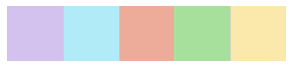

In [145]:
import json
import os
import glob
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
import cv2
import seaborn as sns
import missingno as msno 
import altair as alt
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Set Color Palettes for the notebook
# colors_nude = ['#e0798c','#65365a','#da8886','#cfc4c4','#dfd7ca']
# colors_nude = ['#FEC5CB', '#FEDC5D', '#A3CFC5', '#B4D4ED', '#F7A7A3']
colors_nude = ['#D3C2ED', '#B0EBF7', '#EDAB9A', '#A7E09D', '#FAE9AA']
sns.palplot(sns.color_palette(colors_nude))

# Set Style
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)

In [138]:
labels_df

,ID,dcm_name,age,anatomy,benign_malignant,diagnosis,sex,target
0,5436e3acbae478396759f0d1,ISIC_0000001,30.0,anterior torso,benign,nevus,female,0
1,5436e3acbae478396759f0d3,ISIC_0000002,60.0,upper extremity,malignant,melanoma,female,1
2,5436e3acbae478396759f0d5,ISIC_0000003,30.0,upper extremity,benign,nevus,male,0
3,5436e3acbae478396759f0d9,ISIC_0000005,40.0,anterior torso,benign,nevus,female,0
4,5436e3acbae478396759f0df,ISIC_0000008,30.0,anterior torso,benign,nevus,female,0
...,...,...,...,...,...,...,...,...
50044,IP_6526534,ISIC_9999134,50.0,torso,benign,unknown,male,0
50045,IP_3650745,ISIC_9999320,65.0,torso,benign,unknown,male,0
50046,IP_2026598,ISIC_9999515,20.0,lower extremity,benign,unknown,male,0
50047,IP_7702038,ISIC_9999666,50.0,lower extremity,benign,unknown,male,0


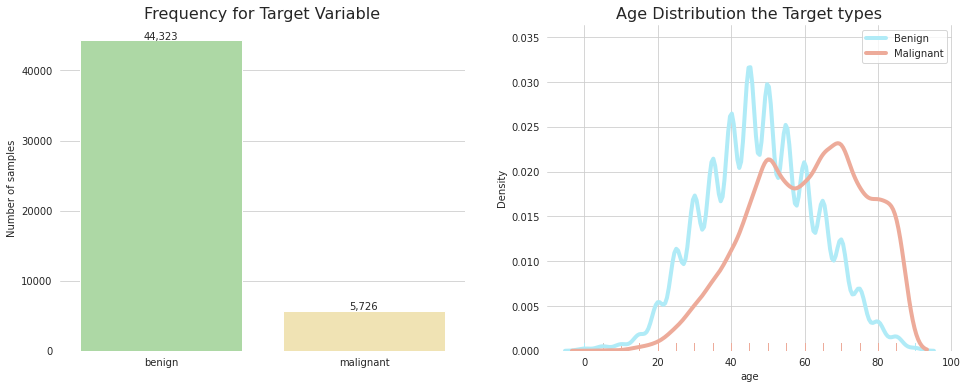

In [162]:
# Figure
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 6))

a = sns.countplot(data = labels_df, x = 'benign_malignant', palette=colors_nude[3:5],
                 ax=ax1)
b = sns.distplot(a = labels_df[labels_df['target']==0]['age'], ax=ax2, color=colors_nude[1], 
                 hist=False, rug=True, kde_kws=dict(linewidth=4), label='Benign')
c = sns.distplot(a = labels_df[labels_df['target']==1]['age'], ax=ax2, color=colors_nude[2], 
                 hist=False, rug=True, kde_kws=dict(linewidth=4), label='Malignant')

for p in a.patches:
    a.annotate(format(p.get_height(), ','), 
           (p.get_x() + p.get_width() / 2., 
            p.get_height()), ha = 'center', va = 'center', 
           xytext = (0, 4), textcoords = 'offset points')

plt.legend()
ax1.set_title('Frequency for Target Variable', fontsize=16)
ax1.set(xlabel=' ', ylabel='Number of samples')
ax2.set_title('Age Distribution the Target types', fontsize=16)
sns.despine(left=True, bottom=True);

In [169]:
diagnosis = labels_df.copy()
diagnosis['flag'] = np.where(labels_df['diagnosis'].isna()==True, 'missing', 'not_missing')

# Benign - malignant
ben_mal = diagnosis[diagnosis['flag'] == 'not_missing']['benign_malignant'].value_counts()
print('From all values, {} are benign and {} malignant.'.format(ben_mal[0], ben_mal[1]))

From all values, 44323 are benign and 5726 malignant.


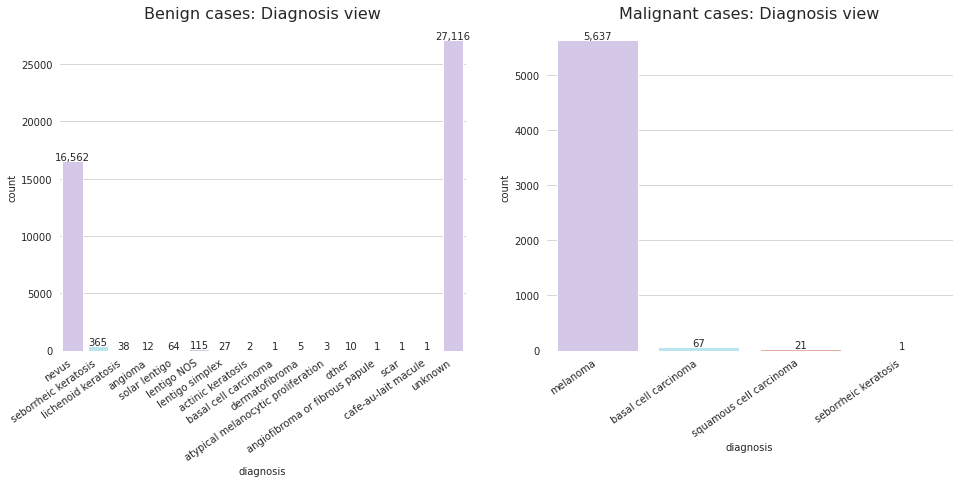

In [170]:
# Figure
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 6))

a = sns.countplot(diagnosis[diagnosis['target']==0]['diagnosis'], ax=ax1, palette = colors_nude)
b = sns.countplot(diagnosis[diagnosis['target']==1]['diagnosis'], ax=ax2, palette = colors_nude)

a.set_xticklabels(a.get_xticklabels(), rotation=35, ha="right")
b.set_xticklabels(b.get_xticklabels(), rotation=35, ha="right")

for p in a.patches:
    a.annotate(format(p.get_height(), ','), 
           (p.get_x() + p.get_width() / 2., 
            p.get_height()), ha = 'center', va = 'center', 
           xytext = (0, 4), textcoords = 'offset points')
    
for p in b.patches:
    b.annotate(format(p.get_height(), ','), 
           (p.get_x() + p.get_width() / 2., 
            p.get_height()), ha = 'center', va = 'center', 
           xytext = (0, 4), textcoords = 'offset points')
    
ax1.set_title('Benign cases: Diagnosis view', fontsize=16)
ax2.set_title('Malignant cases: Diagnosis view', fontsize=16)
sns.despine(left=True, bottom=True);

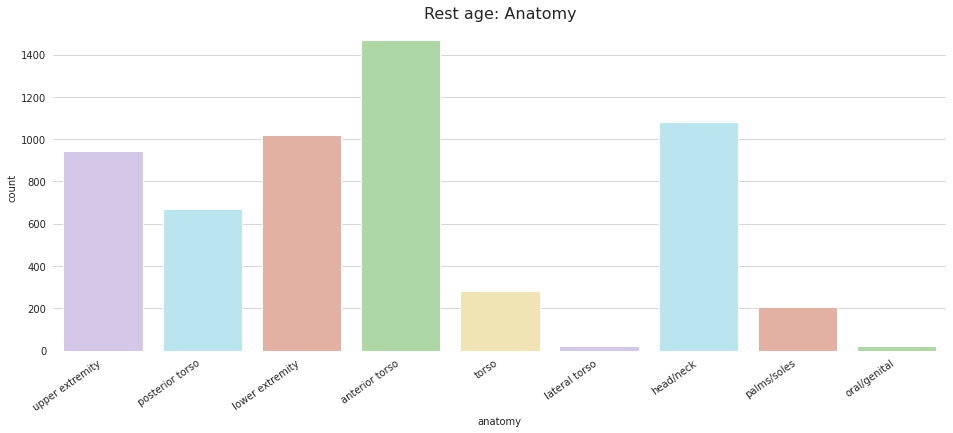

In [174]:
# Data
# nan_age = labels_df[labels_df['age'].isna() == True]
is_age = labels_df[labels_df['target'] == 1]

# Figure
f, ax1 = plt.subplots(1, 1, figsize = (16, 6))

# a = sns.countplot(nan_age['anatomy'], ax = ax1, palette=colors_nude)
b = sns.countplot(is_age['anatomy'], ax = ax1, palette=colors_nude)
# ax1.set_title('NAN age: Anatomy', fontsize=16)
ax1.set_title('Rest age: Anatomy', fontsize=16)

# a.set_xticklabels(a.get_xticklabels(), rotation=35, ha="right")
b.set_xticklabels(b.get_xticklabels(), rotation=35, ha="right")
sns.despine(left=True, bottom=True);

# Benign/ Malignant check
# print('Out of {} NAN values, {} are benign and {} malignant.'.format(df_mask['age'].isna().sum(),nan_age['benign_malignant'].value_counts()[0],nan_age['benign_malignant'].value_counts()[1]))